# KNN | Glass_data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
glass=pd.read_csv("Glass.csv")

In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### EDA

In [5]:
len(glass)

214

In [9]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [12]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
# There are no missing values

In [18]:
glass[glass['Fe']==0].count()

RI      144
Na      144
Mg      144
Al      144
Si      144
K       144
Ca      144
Ba      144
Fe      144
Type    144
dtype: int64

In [31]:
glass.shape

(214, 10)

### Graphical Analysis

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


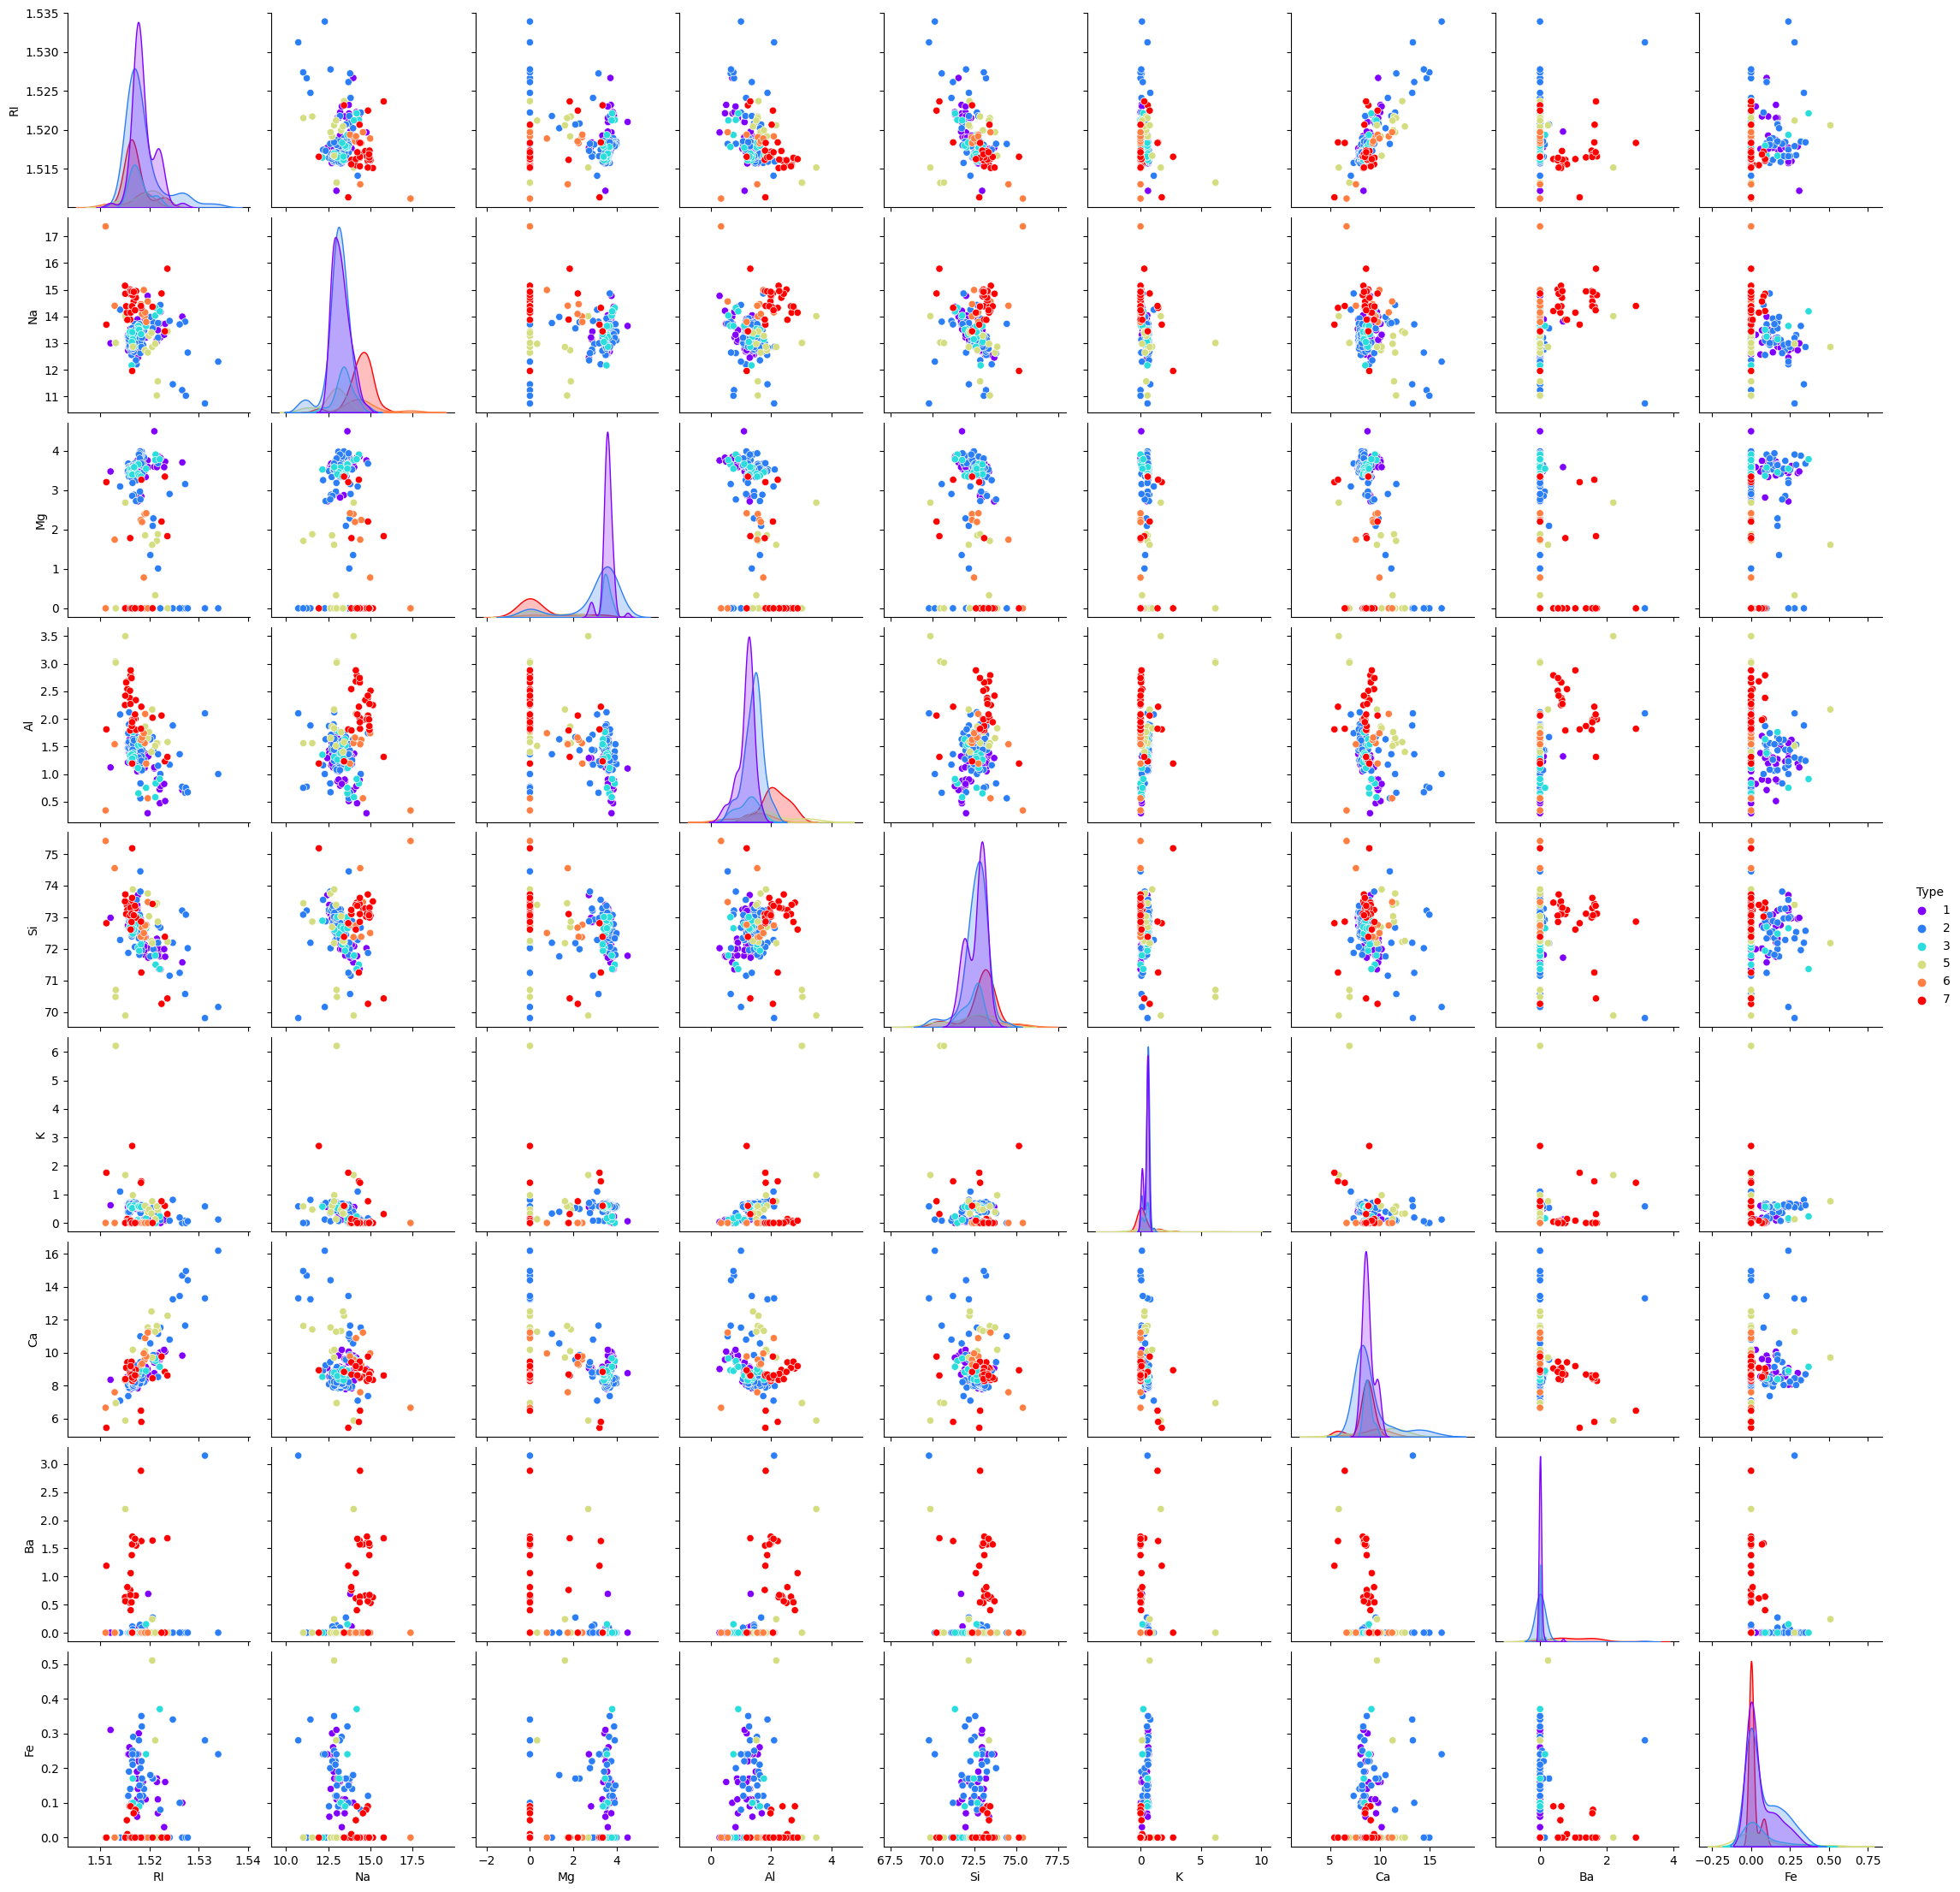

In [20]:
sns.pairplot(glass,hue='Type',palette='rainbow')

<Axes: >

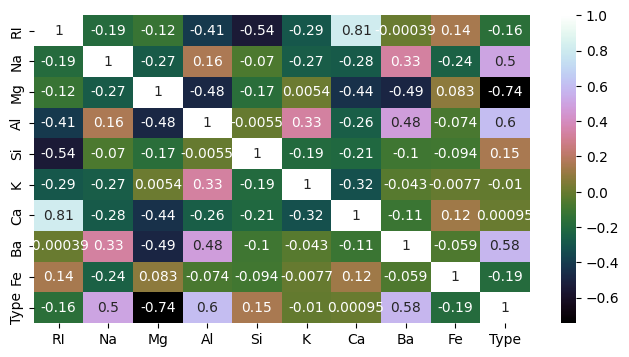

In [30]:
plt.figure(figsize=(8,4))
sns.heatmap(glass.corr(),annot=True,cmap='cubehelix')

#### Correlatin looks fine.. There is no serious issue of multicollinearity

In [42]:
# Split into Feature variables x and target variable y
X=glass.iloc[:,0:9]
y=glass.iloc[:,-1]

In [45]:
y.head() , X.head()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: Type, dtype: int64,
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
 0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
 1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
 2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
 3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
 4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0)

Text(0.5, 1.0, 'PiePlot of Type')

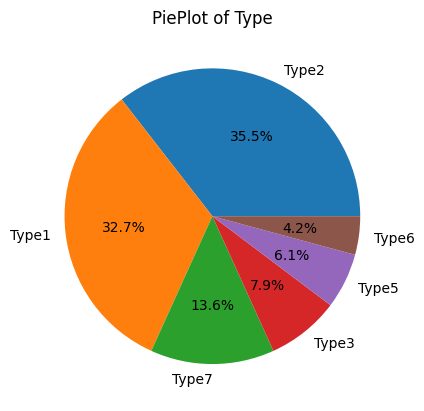

In [59]:
#Piechart and countplot of Target variable
value_counts=y.value_counts()
labels=value_counts.index
values=value_counts.values
labels=['Type2', 'Type1', 'Type7', 'Type3', 'Type5', 'Type6']
#Piechart
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('PiePlot of Type')

Text(0.5, 1.0, 'Bar plot of Type (Target)')

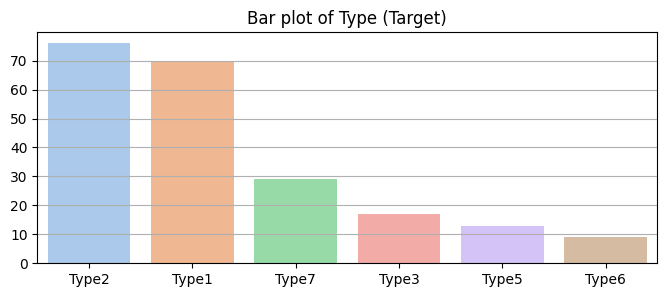

In [61]:
# Count plot of Type
plt.figure(figsize=(8,3))
plt.grid()
sns.barplot(x=labels,y=values,palette='pastel')
plt.title('Bar plot of Type (Target)')

#### Target distribution is not uniform

### KNN Modelling

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=27)
kmodel=KNeighborsClassifier(n_neighbors=1)
kmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### Prediction and Evaluation

In [197]:
y_pred=kmodel.predict(X_test)

In [198]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [199]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[ 9,  2,  1,  0,  0,  0],
       [ 2, 11,  0,  1,  1,  1],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 10]], dtype=int64)

In [200]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.75      0.72        12
           2       0.85      0.69      0.76        16
           3       0.50      0.33      0.40         3
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         1
           7       0.91      1.00      0.95        10

    accuracy                           0.77        43
   macro avg       0.66      0.80      0.69        43
weighted avg       0.78      0.77      0.76        43



###  Figure out optimum value of 'k'

In [153]:
error=[]
for k in range(1,50):
    kmodel1=KNeighborsClassifier(n_neighbors=k)
    kmodel1.fit(X_train,y_train)
    y_pred1=kmodel1.predict(X_test)
    error.append(np.mean(y_pred1!=y_test))

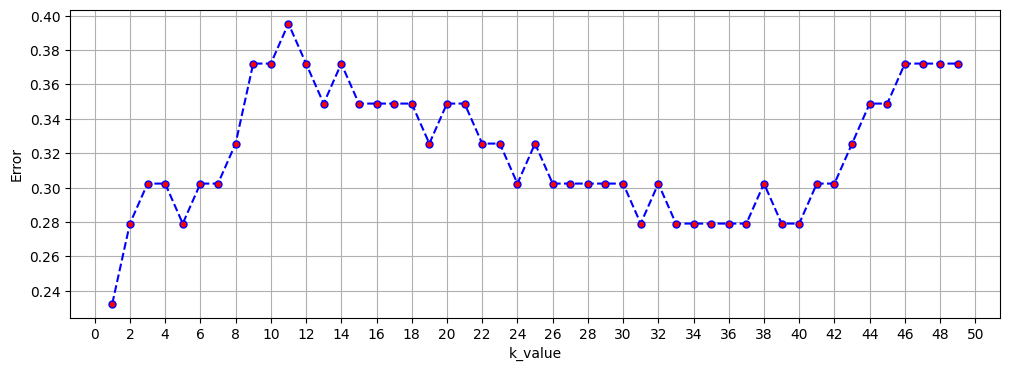

In [154]:
#plot error vs different value of k
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(range(1,50),error,marker='o',linestyle='dashed',markersize=5,color='b',markerfacecolor='r')
plt.xticks(np.linspace(0,50,26))
plt.xlabel('k_value')
plt.ylabel('Error')
plt.show()

#### In the range of 26 to 42 we can see a constant error rate between .28 and .3.Lets check with k=31

In [155]:
kmodel31= KNeighborsClassifier(n_neighbors=31)
kmodel31.fit(X_train,y_train)
pred_31 = kmodel31.predict(X_test)

print(confusion_matrix(y_test,pred_31))

[[10  2  0  0  0  0]
 [ 3 12  0  0  0  1]
 [ 1  2  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  1  0  0  0  9]]


In [156]:
print(classification_report(y_test,pred_31))

              precision    recall  f1-score   support

           1       0.67      0.83      0.74        12
           2       0.67      0.75      0.71        16
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.90      0.90      0.90        10

    accuracy                           0.72        43
   macro avg       0.37      0.41      0.39        43
weighted avg       0.64      0.72      0.68        43



C:\Users\rakes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rakes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rakes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### We get relatively less performance with k=31. Lets do scaling of parameters and model again since KNN model is sensitive to scaled values and remove redundant features

### Feature Selection

In [160]:
# Correlation between 'Type' and 'Ca'
glass.Type.corr(glass.Ca)

0.0009522245641598272

In [168]:
#Lets remove the feature 'Ca'
Xf=X.copy()
yf=y.copy()
Xf.drop('Ca',axis=1,inplace=True)
Xf.tail()


,RI,Na,Mg,Al,Si,K,Ba,Fe
209,1.51623,14.14,0.0,2.88,72.61,0.08,1.06,0.0
210,1.51685,14.92,0.0,1.99,73.06,0.00,1.59,0.0
211,1.52065,14.36,0.0,2.02,73.42,0.00,1.64,0.0
212,1.51651,14.38,0.0,1.94,73.61,0.00,1.57,0.0
213,1.51711,14.23,0.0,2.08,73.36,0.00,1.67,0.0


### Feature Scaling

In [172]:
from sklearn import preprocessing
# Use min-max scaling
scaler = preprocessing.MinMaxScaler()

Xf['RI']=scaler.fit_transform(Xf[['RI']])
Xf['Na']=scaler.fit_transform(Xf[['Na']])
Xf['Al']=scaler.fit_transform(Xf[['Al']])
Xf['Si']=scaler.fit_transform(Xf[['Si']])
Xf['Ba']=scaler.fit_transform(Xf[['Ba']])
Xf['Fe']=scaler.fit_transform(Xf[['Fe']])
Xf['K'] =scaler.fit_transform(Xf[['K']])
Xf['Mg']=scaler.fit_transform(Xf[['Mg']])

Xf.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.0,0.0


#### New KNN Model

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Xf_train,Xf_test,yf_train,yf_test = train_test_split(Xf,yf,test_size=.3,random_state=20)
kmodelf=KNeighborsClassifier(n_neighbors=1)
kmodelf.fit(Xf_train,yf_train)

kmodelf= KNeighborsClassifier(n_neighbors=1)
kmodelf.fit(Xf_train,yf_train)
pred_f = kmodelf.predict(Xf_test)

print(confusion_matrix(yf_test,pred_f))
print('\n')

[[11  3  1  0  0  0]
 [ 9 16  0  1  1  0]
 [ 1  5  2  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0  2  0]
 [ 0  1  0  1  0  7]]




In [184]:
print(classification_report(yf_test,pred_f))

              precision    recall  f1-score   support

           1       0.52      0.73      0.61        15
           2       0.64      0.59      0.62        27
           3       0.67      0.25      0.36         8
           5       0.60      0.75      0.67         4
           6       0.67      1.00      0.80         2
           7       0.88      0.78      0.82         9

    accuracy                           0.63        65
   macro avg       0.66      0.68      0.65        65
weighted avg       0.65      0.63      0.62        65



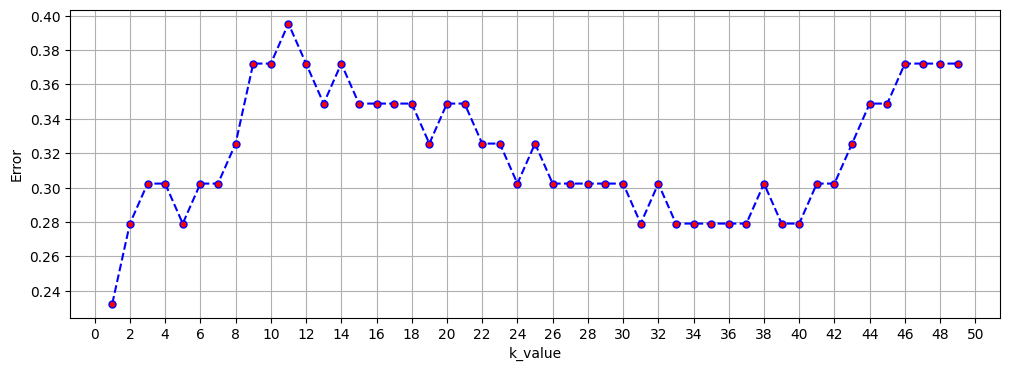

In [185]:
errorf=[]
for i in range(1,50):
    
    kmodelf = KNeighborsClassifier(n_neighbors=i)
    kmodelf.fit(Xf_train,yf_train)
    yf_pred_i= kmodelf.predict(Xf_test)
    errorf.append(np.mean(yf_pred_i != yf_test))
    
#plot error vs different value of k
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(range(1,50),error,marker='o',linestyle='dashed',markersize=5,color='b',markerfacecolor='r')
plt.xticks(np.linspace(0,50,26))
plt.xlabel('k_value')
plt.ylabel('Error')
plt.show()

#### We dont see any improvement in the model. Lets go for Bagging ,(Bootstrap Aggregation),Voting & K-Fold Cross validation with our first model 'kmodel' where k=1 ( We dnt obseve any overfitting issue which may occur while k=1)

### Bagging

In [245]:
from sklearn.ensemble import BaggingClassifier
#Bagging classifier as KNN as the base_estimator
#KNN model = kmodel
kmodel_bag=BaggingClassifier(estimator=kmodel,n_estimators=10,random_state=30)
kmodel_bag.fit(X_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=1),
                  random_state=30)

In [246]:
#Prediction
ybag_pred=kmodel_bag.predict(X_test)

In [247]:
#Confusion Matrix
confusion_matrix(ybag_pred,y_test)

array([[ 9,  3,  2,  0,  0,  0],
       [ 2, 10,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 10]], dtype=int64)

In [248]:
# classification report
print(classification_report(ybag_pred,y_test))

              precision    recall  f1-score   support

           1       0.75      0.64      0.69        14
           2       0.62      0.83      0.71        12
           3       0.33      0.50      0.40         2
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         1
           7       1.00      0.91      0.95        11

    accuracy                           0.74        43
   macro avg       0.78      0.70      0.71        43
weighted avg       0.78      0.74      0.75        43



#### Minority class prediction performance has slightly reduced with bagging classifier

### Conclusion:
####  KNN model has been developed with different k values ,scaled data and Bagging. A model with k=1 gives better accuracy and minority class prediction.